# 🔧 Data Preparation for Modeling

Ce notebook prépare les données pour l'entraînement du modèle :
1. Split train/validation/test (time-based)
2. Gestion des valeurs manquantes
3. Feature scaling
4. Vérifications de qualité


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Ajouter le dossier src au path
sys.path.append('..')

from src.data.prepare import DataPreparator

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Imports successful")


✅ Imports successful


## 1. Préparer les Données


In [2]:
# Créer le preparator
preparator = DataPreparator(random_state=42)

# Préparer les données
data = preparator.prepare_data(
    features_path='../data/processed/v1/features.parquet',
    output_dir='../data/processed/v1',
    min_gameweek=10,  # Commencer à gameweek 10 (avoir assez d'historique)
    max_missing_pct=30  # Supprimer features avec >30% manquant
)



DATA PREPARATION FOR MODELING

📥 Loading features...
   Loaded: 6,076 records, 44 features

🔍 Filtering gameweek >= 10...
   Retained: 4,640 records (76.4%)

🧹 Handling missing values...
   Dropped 1 features with >30% missing
   Remaining features: 43

📊 Separating features, metadata and target...
   Features: 38
   Target: target_final_points
   Samples: 4,640

✂️  Splitting data (time-based)...
   Available seasons: ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
   Train seasons: ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021']
   Val season: 2021-2022
   Test season: 2022-2023
   Train: 3,480 samples (75.0%)
   Val:   580 samples (12.5%)
   Test:  580 samples (12.5%)

🔧 Imputing remaining missing values...
   Remaining NaN - Train: 0, Val: 0, Test: 0

📏 Scaling features...

💾 Saving datasets...
   ✓ train.parquet: 3480 records
   ✓ val.parquet: 580 records
   ✓ test.parquet: 580 records
   ✓ Sc

## 2. Charger les Datasets Préparés


In [3]:
# Charger les datasets
train_df = pd.read_parquet('../data/processed/v1/train.parquet')
val_df = pd.read_parquet('../data/processed/v1/val.parquet')
test_df = pd.read_parquet('../data/processed/v1/test.parquet')

print(f"📊 Dataset Sizes:")
print(f"   Train: {len(train_df):,} records")
print(f"   Val:   {len(val_df):,} records")
print(f"   Test:  {len(test_df):,} records")
print(f"   Total: {len(train_df) + len(val_df) + len(test_df):,} records")

print(f"\n📅 Seasons:")
print(f"   Train: {sorted(train_df['season'].unique())}")
print(f"   Val:   {sorted(val_df['season'].unique())}")
print(f"   Test:  {sorted(test_df['season'].unique())}")


📊 Dataset Sizes:
   Train: 3,480 records
   Val:   580 records
   Test:  580 records
   Total: 4,640 records

📅 Seasons:
   Train: ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021']
   Val:   ['2021-2022']
   Test:  ['2022-2023']


## 3. Visualiser la Distribution du Target


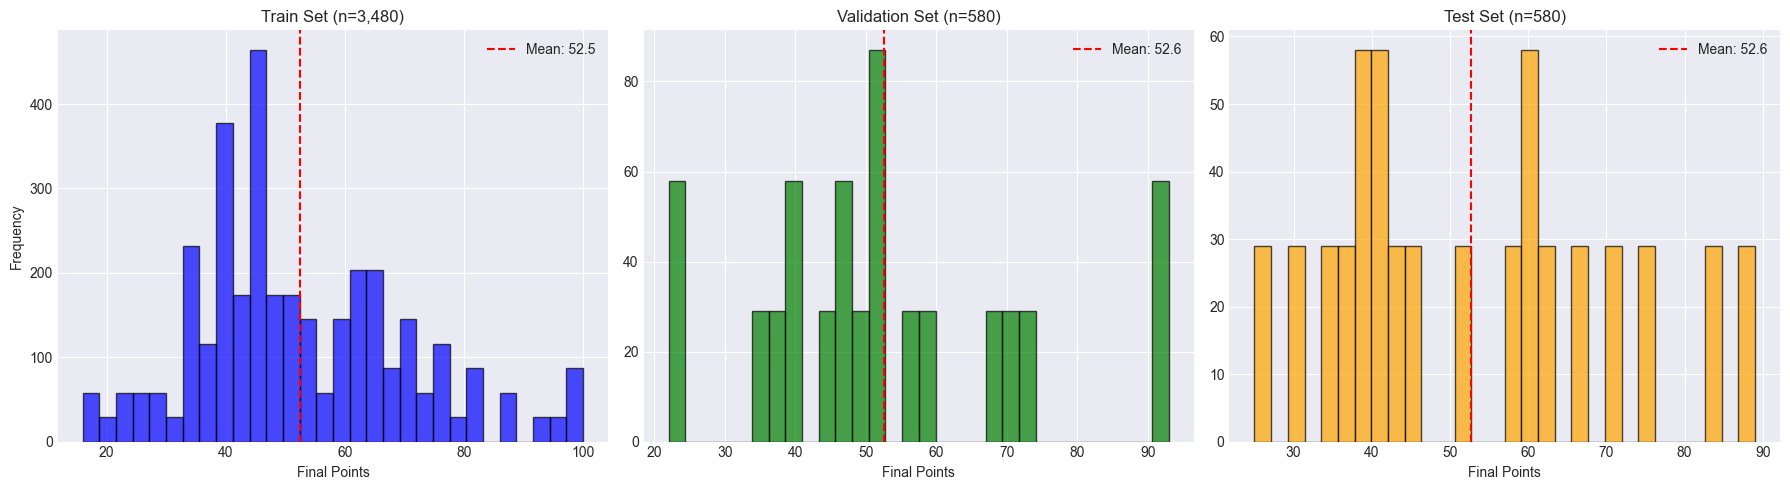


📊 Target Statistics:
   Train - Mean: 52.53, Std: 17.99
   Val   - Mean: 52.60, Std: 18.87
   Test  - Mean: 52.65, Std: 17.74


In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train
axes[0].hist(train_df['target_final_points'], bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[0].set_title(f'Train Set (n={len(train_df):,})')
axes[0].set_xlabel('Final Points')
axes[0].set_ylabel('Frequency')
axes[0].axvline(train_df['target_final_points'].mean(), color='red', linestyle='--', 
                label=f'Mean: {train_df["target_final_points"].mean():.1f}')
axes[0].legend()

# Val
axes[1].hist(val_df['target_final_points'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title(f'Validation Set (n={len(val_df):,})')
axes[1].set_xlabel('Final Points')
axes[1].axvline(val_df['target_final_points'].mean(), color='red', linestyle='--', 
                label=f'Mean: {val_df["target_final_points"].mean():.1f}')
axes[1].legend()

# Test
axes[2].hist(test_df['target_final_points'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[2].set_title(f'Test Set (n={len(test_df):,})')
axes[2].set_xlabel('Final Points')
axes[2].axvline(test_df['target_final_points'].mean(), color='red', linestyle='--', 
                label=f'Mean: {test_df["target_final_points"].mean():.1f}')
axes[2].legend()

plt.tight_layout()
plt.show()

print("\n📊 Target Statistics:")
print(f"   Train - Mean: {train_df['target_final_points'].mean():.2f}, Std: {train_df['target_final_points'].std():.2f}")
print(f"   Val   - Mean: {val_df['target_final_points'].mean():.2f}, Std: {val_df['target_final_points'].std():.2f}")
print(f"   Test  - Mean: {test_df['target_final_points'].mean():.2f}, Std: {test_df['target_final_points'].std():.2f}")


## 4. Vérifier la Distribution des Features


In [5]:
# Sélectionner les colonnes de features (exclure metadata et target)
metadata_cols = ['season', 'team', 'gameweek']
target_col = 'target_final_points'
feature_cols = [col for col in train_df.columns if col not in metadata_cols + [target_col]]

print(f"📊 Feature Columns: {len(feature_cols)}")

# Vérifier les valeurs manquantes
print(f"\n🔍 Missing Values Check:")
train_missing = train_df[feature_cols].isnull().sum().sum()
val_missing = val_df[feature_cols].isnull().sum().sum()
test_missing = test_df[feature_cols].isnull().sum().sum()

print(f"   Train: {train_missing} missing values")
print(f"   Val:   {val_missing} missing values")
print(f"   Test:  {test_missing} missing values")

if train_missing + val_missing + test_missing == 0:
    print(f"   ✅ No missing values!")


📊 Feature Columns: 38

🔍 Missing Values Check:
   Train: 0 missing values
   Val:   0 missing values
   Test:  0 missing values
   ✅ No missing values!


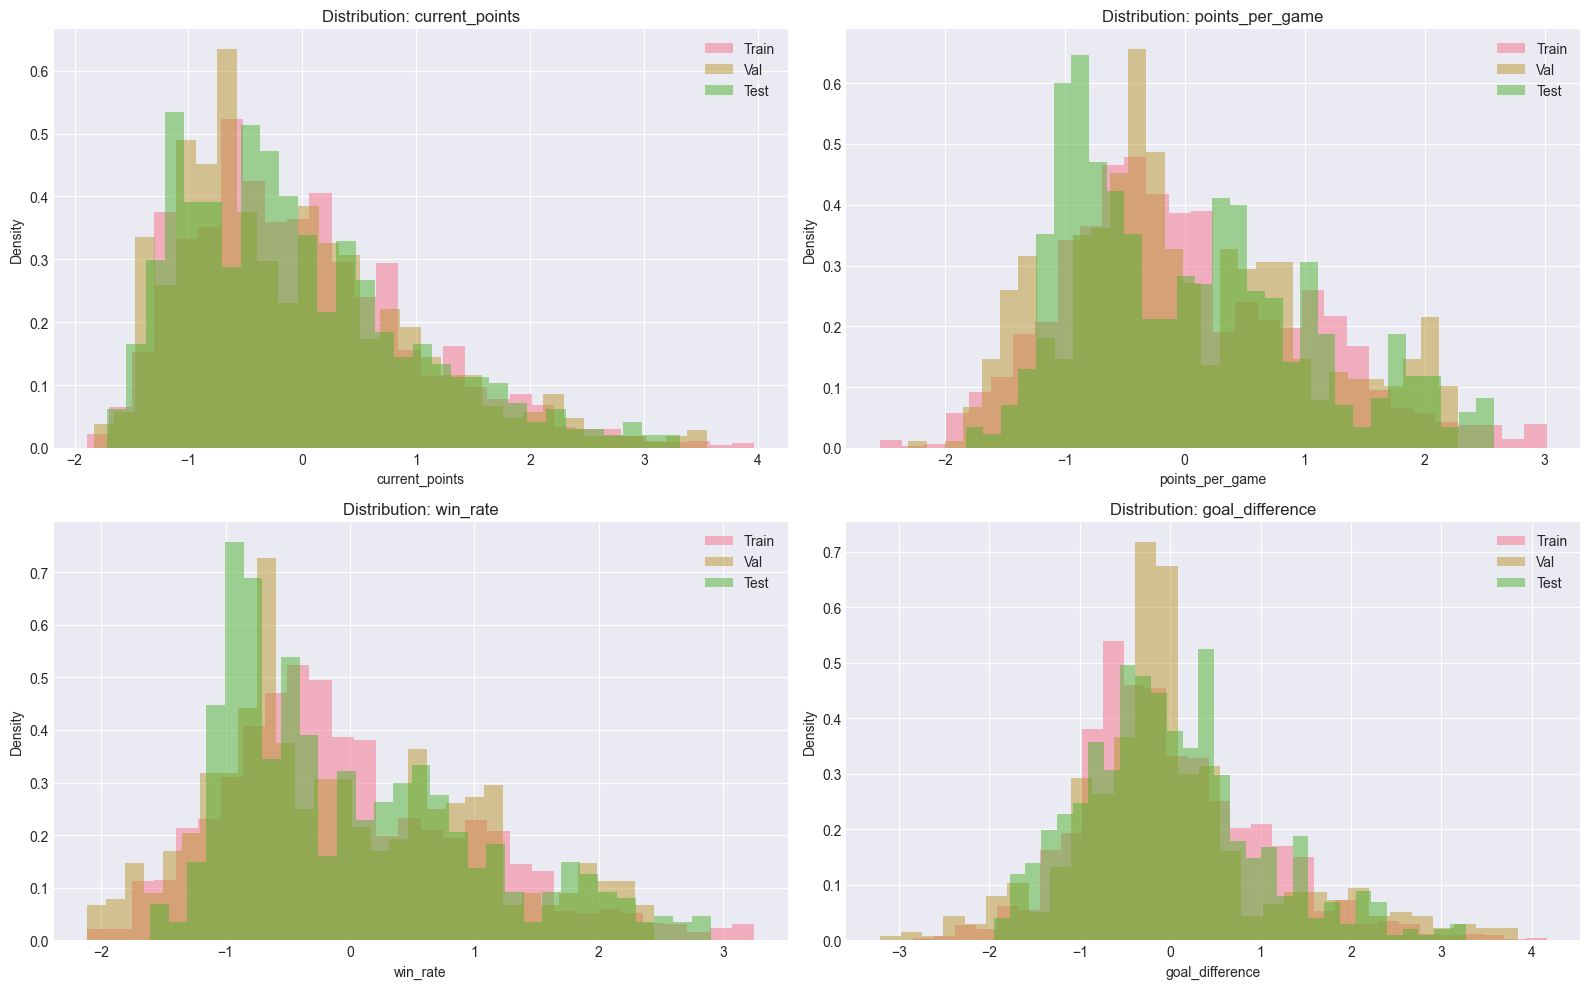

In [6]:
# Comparer quelques features clés entre train/val/test
key_features = ['current_points', 'points_per_game', 'win_rate', 'goal_difference']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in feature_cols:
        axes[idx].hist(train_df[feature], bins=30, alpha=0.5, label='Train', density=True)
        axes[idx].hist(val_df[feature], bins=30, alpha=0.5, label='Val', density=True)
        axes[idx].hist(test_df[feature], bins=30, alpha=0.5, label='Test', density=True)
        axes[idx].set_title(f'Distribution: {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Density')
        axes[idx].legend()

plt.tight_layout()
plt.show()


## 5. Vérifier le Scaling


📏 Feature Scaling Check (Train Set):

Top 10 features:
   current_position               - Mean:   0.000, Std:  1.000
   current_points                 - Mean:   0.000, Std:  1.000
   matches_played                 - Mean:   0.000, Std:  1.000
   wins                           - Mean:   0.000, Std:  1.000
   draws                          - Mean:  -0.000, Std:  1.000
   losses                         - Mean:   0.000, Std:  1.000
   goals_for                      - Mean:  -0.000, Std:  1.000
   goals_against                  - Mean:  -0.000, Std:  1.000
   goal_difference                - Mean:   0.000, Std:  1.000
   points_per_game                - Mean:  -0.000, Std:  1.000


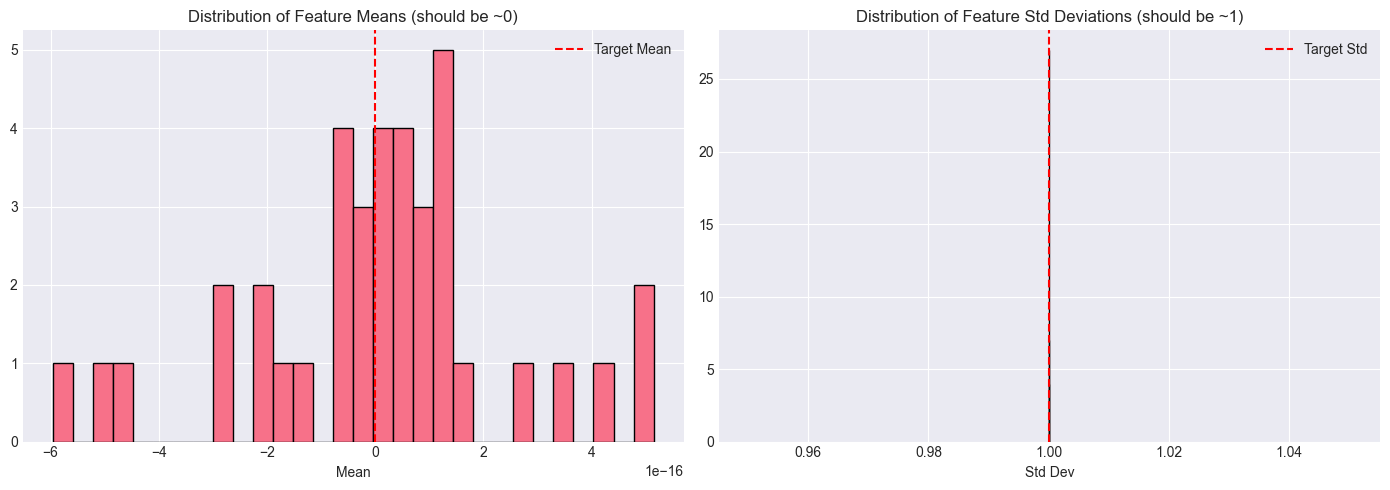

In [7]:
# Vérifier que les features sont bien scaled (mean ≈ 0, std ≈ 1)
train_features = train_df[feature_cols]

print("📏 Feature Scaling Check (Train Set):")
print(f"\nTop 10 features:")
for feat in feature_cols[:10]:
    mean = train_features[feat].mean()
    std = train_features[feat].std()
    print(f"   {feat:30s} - Mean: {mean:7.3f}, Std: {std:6.3f}")

# Visualiser
means = train_features.mean()
stds = train_features.std()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(means, bins=30, edgecolor='black')
axes[0].set_title('Distribution of Feature Means (should be ~0)')
axes[0].set_xlabel('Mean')
axes[0].axvline(0, color='red', linestyle='--', label='Target Mean')
axes[0].legend()

axes[1].hist(stds, bins=30, edgecolor='black')
axes[1].set_title('Distribution of Feature Std Deviations (should be ~1)')
axes[1].set_xlabel('Std Dev')
axes[1].axvline(1, color='red', linestyle='--', label='Target Std')
axes[1].legend()

plt.tight_layout()
plt.show()


## 6. Analyser la Distribution par Gameweek


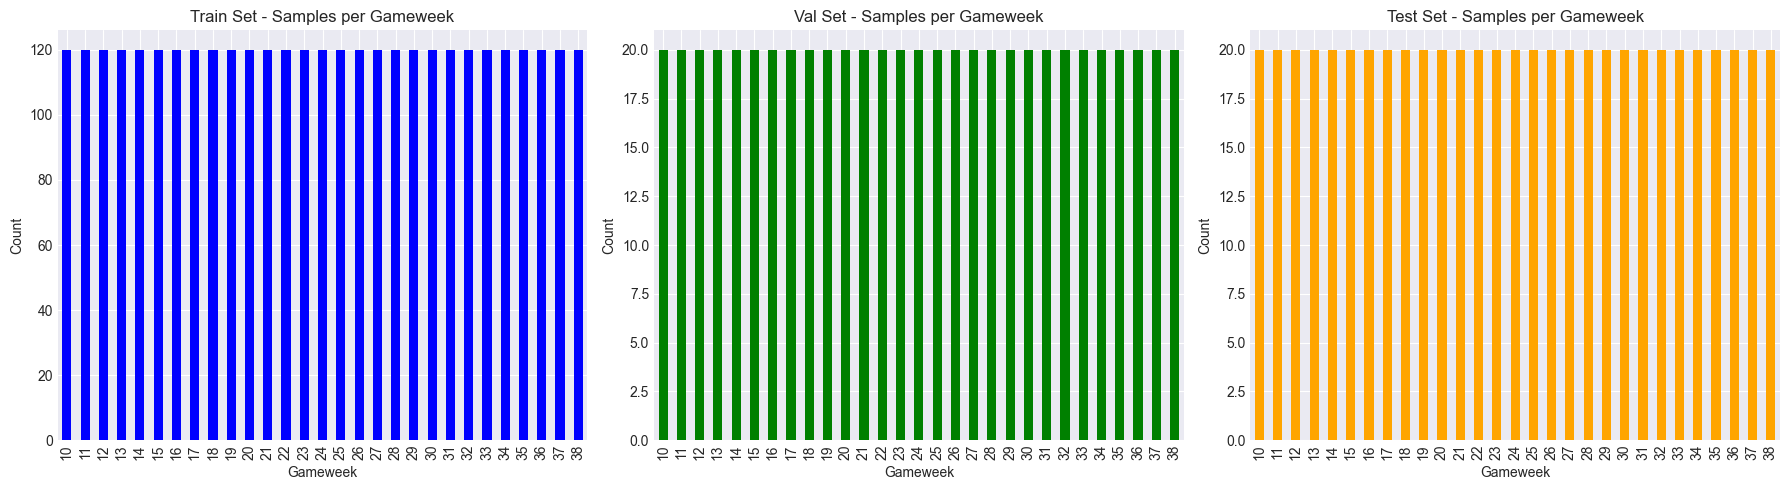

In [8]:
# Nombre d'échantillons par gameweek
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

train_df['gameweek'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Train Set - Samples per Gameweek')
axes[0].set_xlabel('Gameweek')
axes[0].set_ylabel('Count')

val_df['gameweek'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Val Set - Samples per Gameweek')
axes[1].set_xlabel('Gameweek')
axes[1].set_ylabel('Count')

test_df['gameweek'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='orange')
axes[2].set_title('Test Set - Samples per Gameweek')
axes[2].set_xlabel('Gameweek')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


## 7. Résumé et Validation


In [9]:
print("="*70)
print("✅ DATA PREPARATION SUMMARY")
print("="*70)

print(f"\n📊 Dataset Splits:")
total = len(train_df) + len(val_df) + len(test_df)
print(f"   Train: {len(train_df):5,} ({len(train_df)/total*100:5.1f}%)")
print(f"   Val:   {len(val_df):5,} ({len(val_df)/total*100:5.1f}%)")
print(f"   Test:  {len(test_df):5,} ({len(test_df)/total*100:5.1f}%)")
print(f"   Total: {total:5,} (100.0%)")

print(f"\n🎯 Target Distribution:")
print(f"   Train: {train_df['target_final_points'].mean():.1f} ± {train_df['target_final_points'].std():.1f}")
print(f"   Val:   {val_df['target_final_points'].mean():.1f} ± {val_df['target_final_points'].std():.1f}")
print(f"   Test:  {test_df['target_final_points'].mean():.1f} ± {test_df['target_final_points'].std():.1f}")

print(f"\n✨ Features:")
print(f"   Total features: {len(feature_cols)}")
print(f"   Missing values: {train_missing + val_missing + test_missing}")
print(f"   Scaled: Yes (StandardScaler)")

print(f"\n📁 Files Created:")
print(f"   - data/processed/v1/train.parquet")
print(f"   - data/processed/v1/val.parquet")
print(f"   - data/processed/v1/test.parquet")
print(f"   - data/processed/v1/scaler.joblib")
print(f"   - data/processed/v1/preparation_metadata.json")

print(f"\n🎉 Data is ready for modeling!")
print("="*70)


✅ DATA PREPARATION SUMMARY

📊 Dataset Splits:
   Train: 3,480 ( 75.0%)
   Val:     580 ( 12.5%)
   Test:    580 ( 12.5%)
   Total: 4,640 (100.0%)

🎯 Target Distribution:
   Train: 52.5 ± 18.0
   Val:   52.6 ± 18.9
   Test:  52.6 ± 17.7

✨ Features:
   Total features: 38
   Missing values: 0
   Scaled: Yes (StandardScaler)

📁 Files Created:
   - data/processed/v1/train.parquet
   - data/processed/v1/val.parquet
   - data/processed/v1/test.parquet
   - data/processed/v1/scaler.joblib
   - data/processed/v1/preparation_metadata.json

🎉 Data is ready for modeling!
